In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle 
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('marketing_data.csv')

In [5]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.sum().isnull()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# Let's see who made one off purchase of $40761!
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
df['CASH_ADVANCE'].max()

47137.21176

In [12]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

df[df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


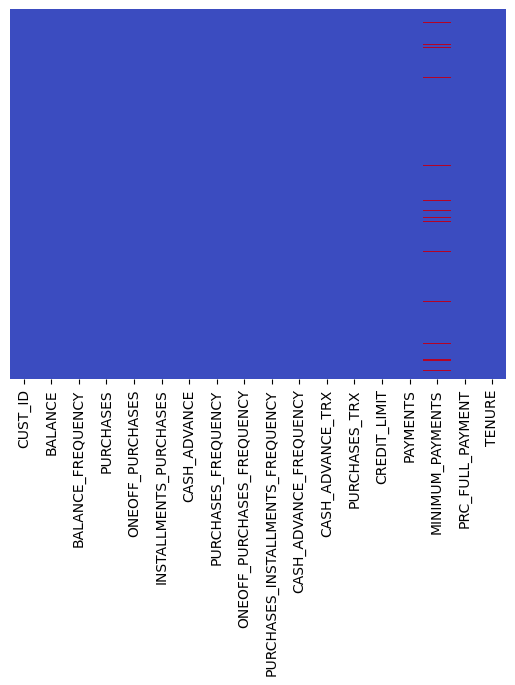

In [13]:
# Let's see if we have any missing data, luckily we don't!

# Hiển thị dữ liệu bị thiếu dưới dạng heatmap.
# yticklabels=False: Ẩn nhãn trục y để biểu đồ gọn gàng hơn.
# cbar=False: Ẩn thanh màu để tập trung vào kết quả chính.
# cmap="coolwarm": Dùng bảng màu "coolwarm" giúp dễ nhìn thấy vùng thiếu dữ liệu.

## Trường hợp không có dữ liệu bị thiếu:
# Nếu không có giá trị NaN, heatmap sẽ hoàn toàn không có vùng màu nóng (thường là đỏ hoặc xanh sáng).
# Khi đó, heatmap sẽ trống hoặc chỉ hiển thị một màu đồng nhất.


sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="coolwarm")
plt.show()

In [14]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

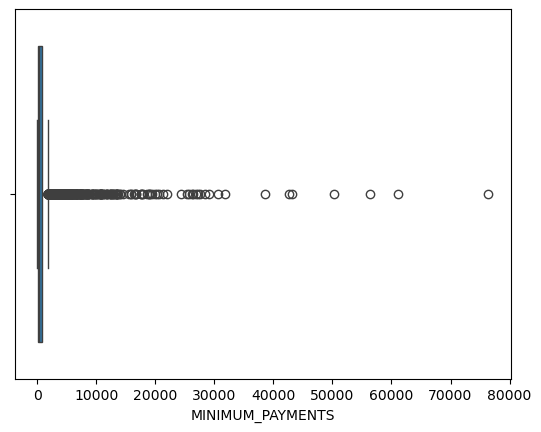

In [15]:
#### Boxplot giúp trực quan hóa sự phân bố của dữ liệu và phát hiện các outliers (điểm ngoại lai).
## Nó bao gồm:
# Hộp (box): Hiển thị khoảng tứ phân vị (IQR – Interquartile Range), gồm:
# Q1 (25%): Phân vị thứ nhất (dưới 25% dữ liệu).
# Q2 (50%) - Median: Giá trị trung vị.
# Q3 (75%): Phân vị thứ ba (dưới 75% dữ liệu).
# Râu (whiskers): Đại diện cho phạm vi dữ liệu không có outliers.
## Điểm ngoại lai (outliers): Các điểm nằm ngoài khoảng Q1 - 1.5*IQR và Q3 + 1.5*IQR, thường được biểu diễn bằng dấu tròn hoặc dấu "x".

### Ví dụ:

# Nếu biểu đồ hộp có nhiều điểm ngoài râu, điều đó có thể có nghĩa là dữ liệu của bạn có outliers.
# Nếu hộp bị lệch về một phía, điều đó có thể cho thấy dữ liệu bị lệch (skewed data).

sns.boxplot(x=df['MINIMUM_PAYMENTS'])
plt.show()

In [16]:
### Because, the boxplot ['MINIUM_PAYMENTS'] have many outlier =>> Median

## Lý do chọn trung vị:
# Trung vị ít bị ảnh hưởng bởi outliers hơn trung bình (mean).
# Nếu dữ liệu có giá trị ngoại lai cao, dùng mean sẽ làm sai lệch kết quả.

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

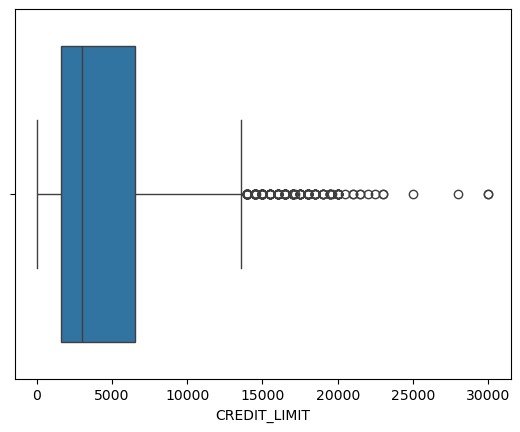

In [17]:
#### Boxplot giúp trực quan hóa sự phân bố của dữ liệu và phát hiện các outliers (điểm ngoại lai).
## Nó bao gồm:
# Hộp (box): Hiển thị khoảng tứ phân vị (IQR – Interquartile Range), gồm:
# Q1 (25%): Phân vị thứ nhất (dưới 25% dữ liệu).
# Q2 (50%) - Median: Giá trị trung vị.
# Q3 (75%): Phân vị thứ ba (dưới 75% dữ liệu).
# Râu (whiskers): Đại diện cho phạm vi dữ liệu không có outliers.
## Điểm ngoại lai (outliers): Các điểm nằm ngoài khoảng Q1 - 1.5*IQR và Q3 + 1.5*IQR, thường được biểu diễn bằng dấu tròn hoặc dấu "x".

### Ví dụ:

# Nếu biểu đồ hộp có nhiều điểm ngoài râu, điều đó có thể có nghĩa là dữ liệu của bạn có outliers.
# Nếu hộp bị lệch về một phía, điều đó có thể cho thấy dữ liệu bị lệch (skewed data).

sns.boxplot(x=df['CREDIT_LIMIT'])
plt.show()

In [18]:
### Because, the boxplot ['CREDIT_LIMIT'] have many outlier =>> Median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [19]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

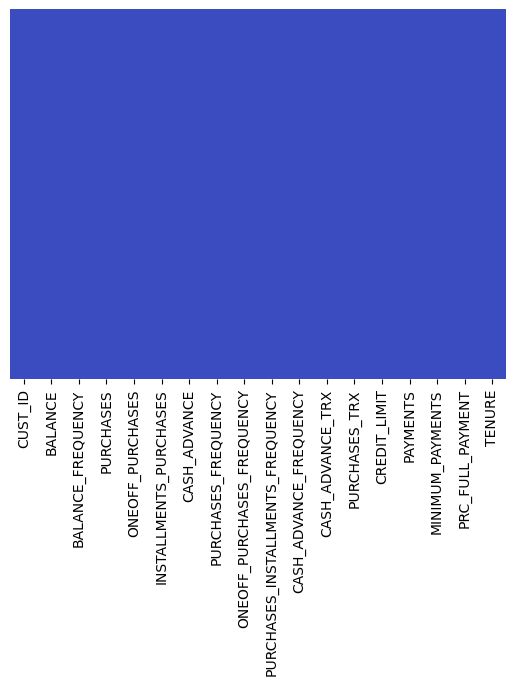

In [20]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="coolwarm")
plt.show()

In [ ]:
# Let's see if we have duplicated entries in the data

# Câu lệnh này giúp đếm số lượng dòng bị trùng lặp trong DataFrame df.
df.duplicated().sum()

0

In [22]:
# Let's drop Customer ID since it has no meaning here 
df.drop("CUST_ID", axis = 1, inplace= True)

In [23]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
n = len(df.columns)
n

17

In [25]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

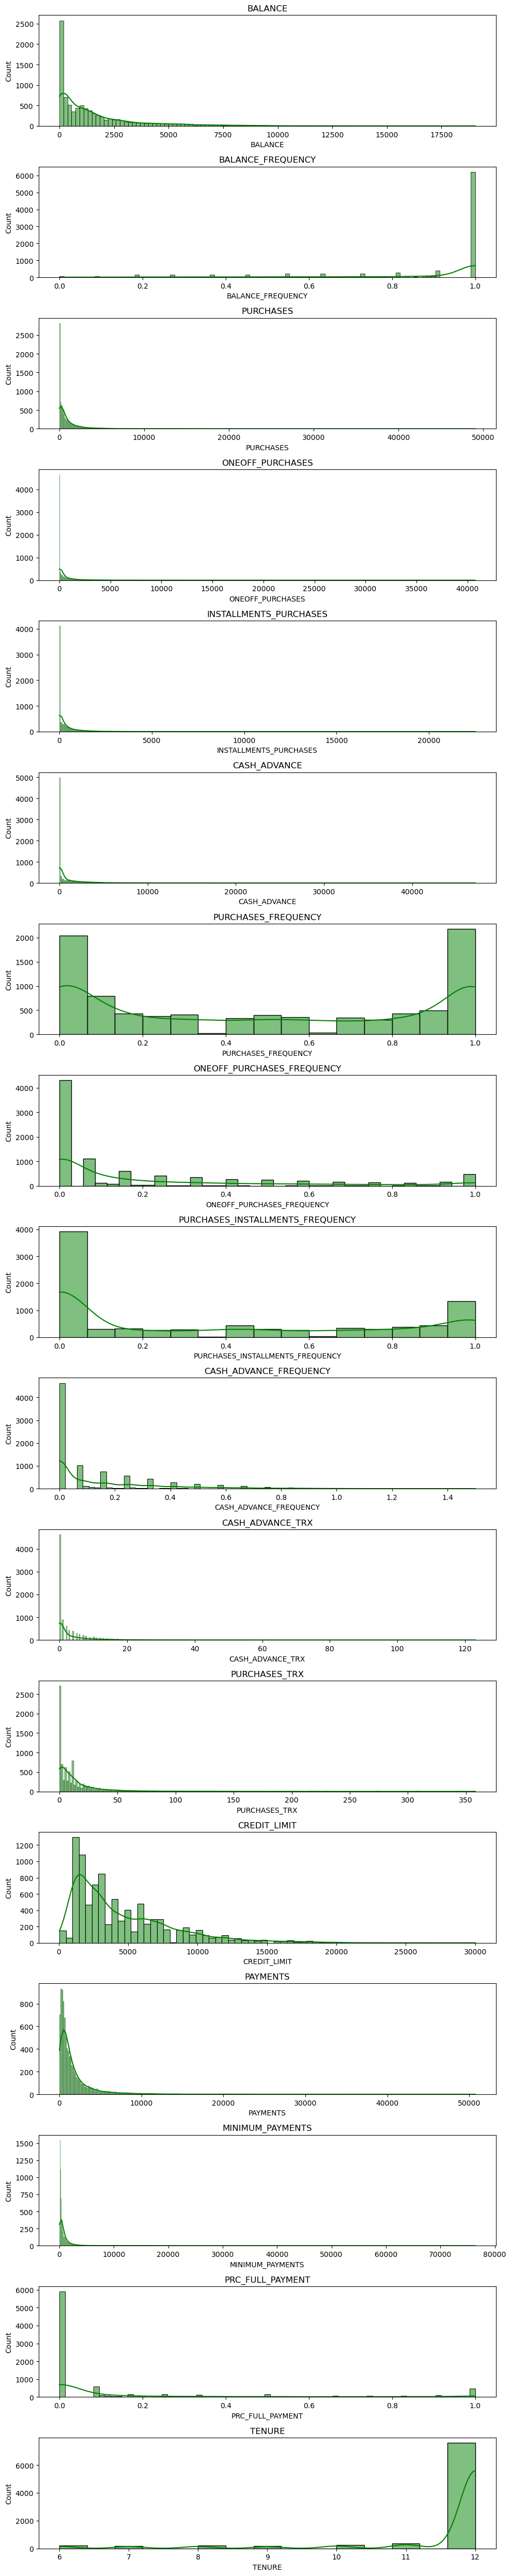

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PU…do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

# df.columns chứa danh sách tên các cột trong DataFrame df.
# len(df.columns): Đếm tổng số cột trong df.
# for i in range(...): Duyệt từng cột một.

# plt.subplot(rows, cols, index) tạo một biểu đồ con trong một lưới có kích thước xác định:
# 17, 1: Nghĩa là có 17 hàng, 1 cột.
# i + 1: Chỉ định vị trí của biểu đồ con (bắt đầu từ 1).
# Nếu số lượng cột nhiều hơn 17, ta có thể thay đổi số hàng.


plt.figure(figsize=(10, 50))

for i in range(len(df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(df[df.columns[i]], kde=True, color="g")
    plt.title(df.columns[i])

# Sắp xếp lại bố cục biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
# Câu lệnh này được sử dụng để tính ma trận tương quan giữa các cột số trong DataFrame df.

# Tương quan là một chỉ số đo mối quan hệ giữa hai biến số:

# Giá trị nằm trong khoảng [-1, 1].
## Nếu:
### Tương quan dương (+1) → Hai biến tăng cùng nhau.
### Tương quan âm (-1) → Một biến tăng, biến kia giảm.
### Tương quan gần 0 → Hai biến không có mối liên hệ rõ ràng.

corr = df.corr()

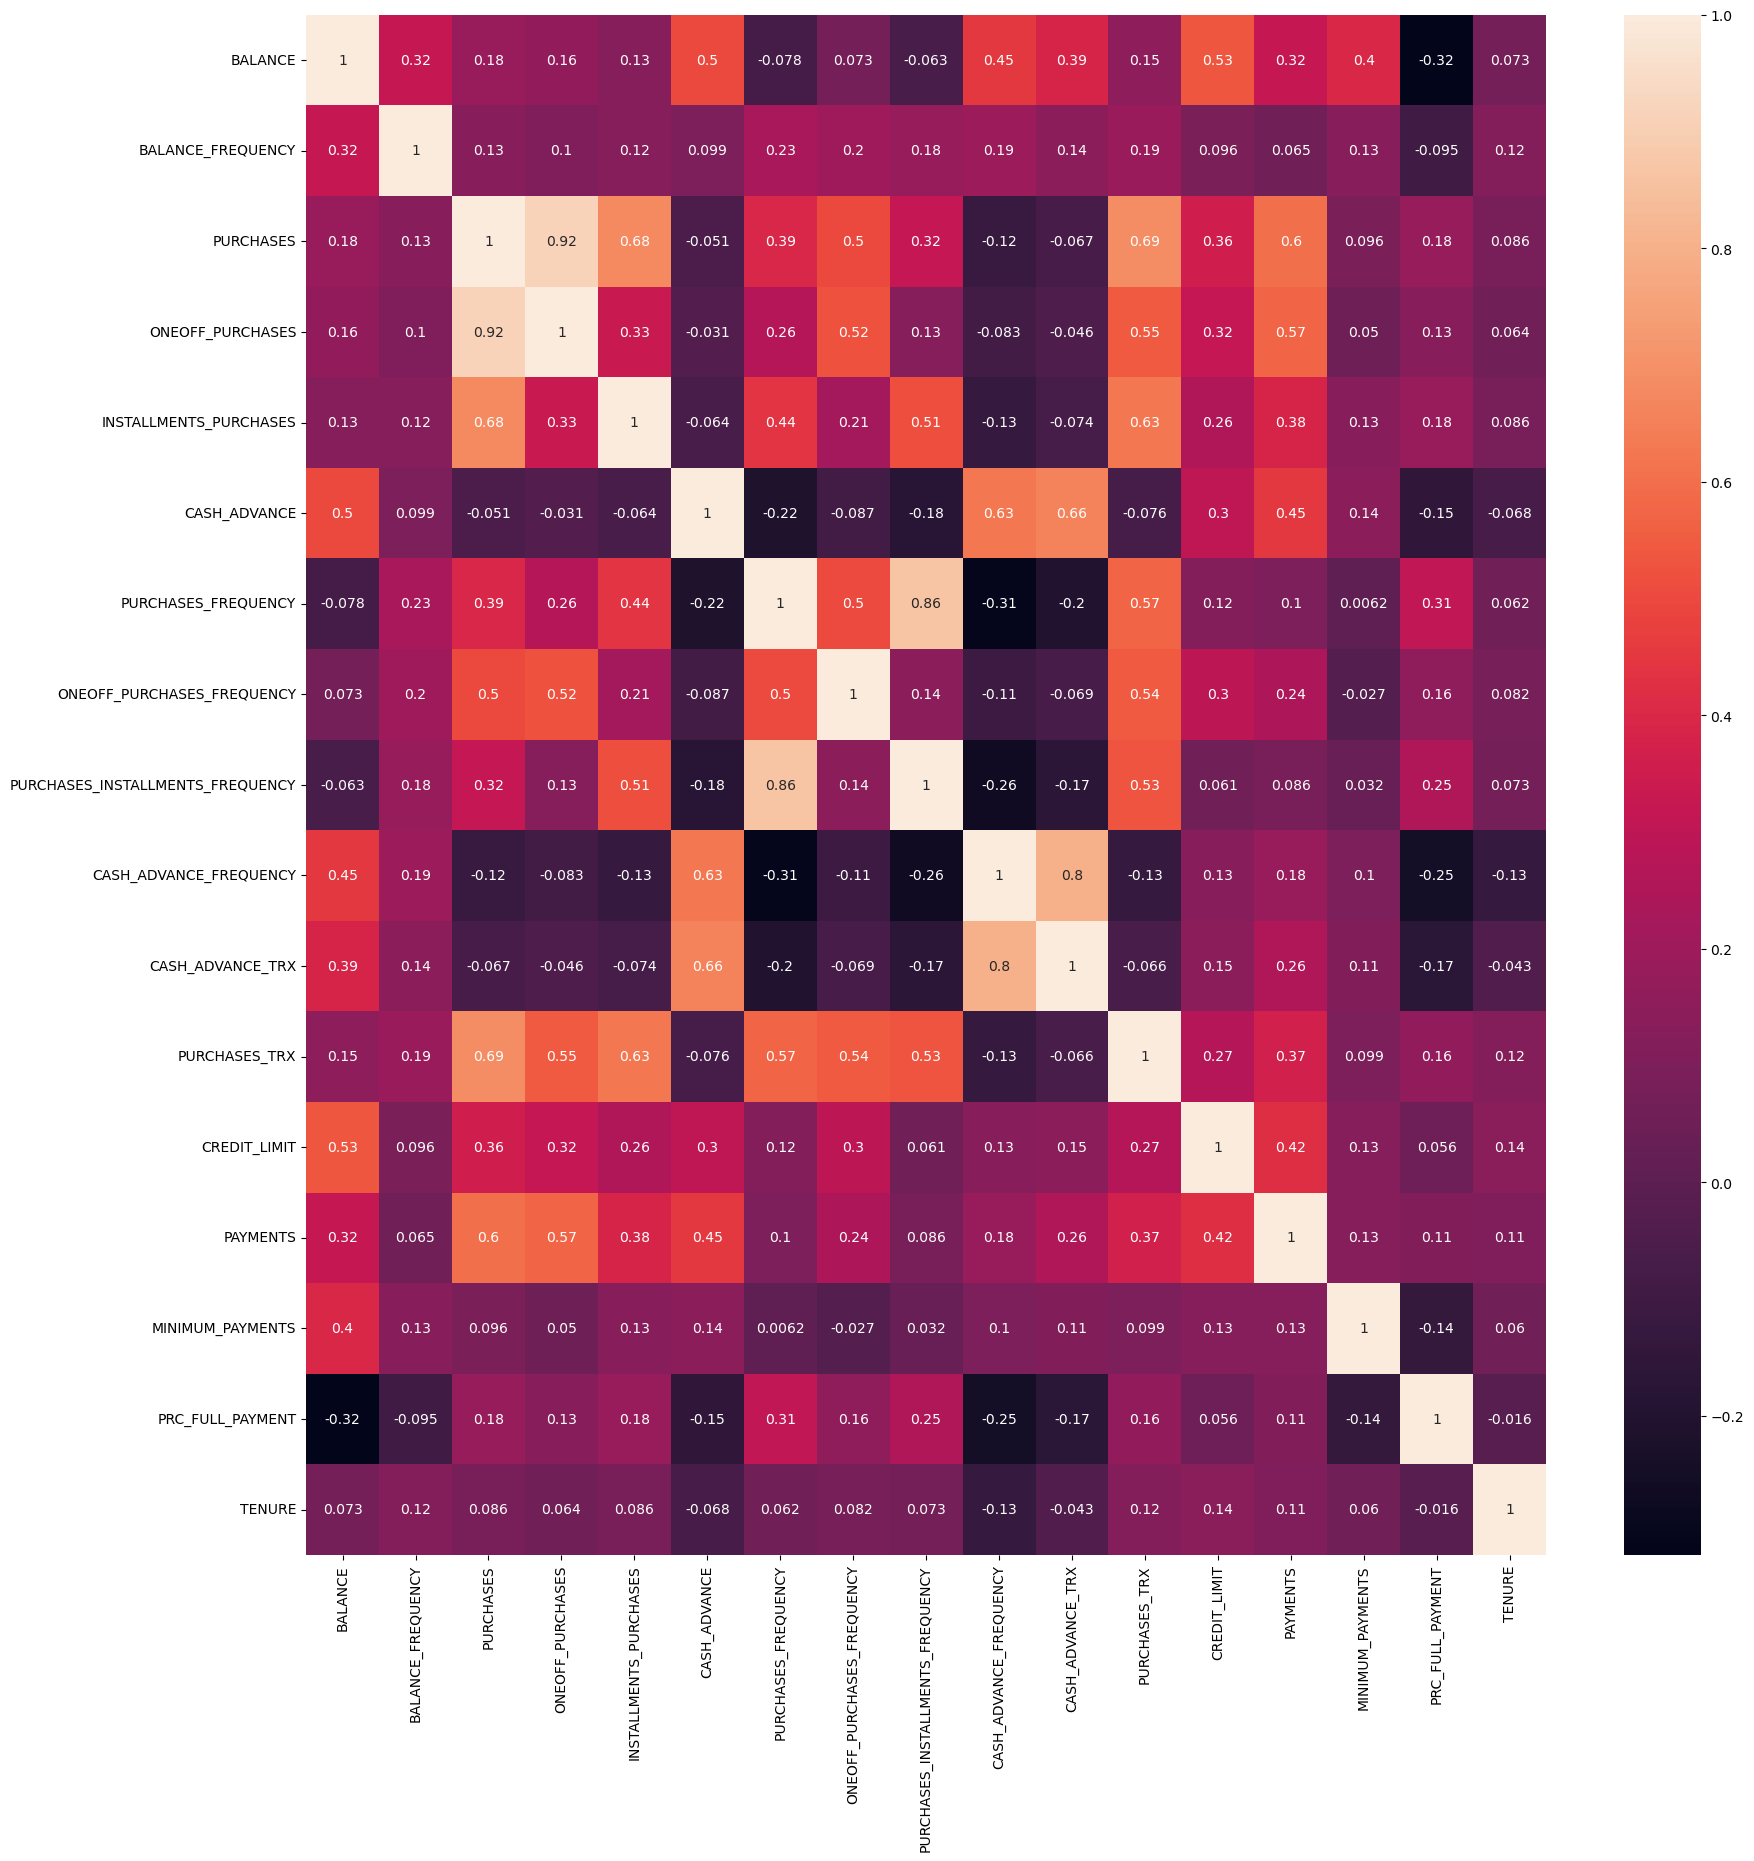

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr, annot = True)
plt.show()

# Tạo một figure (f) và một trục (ax) để vẽ biểu đồ.


# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [30]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [31]:
df_scaled.shape

(8950, 17)

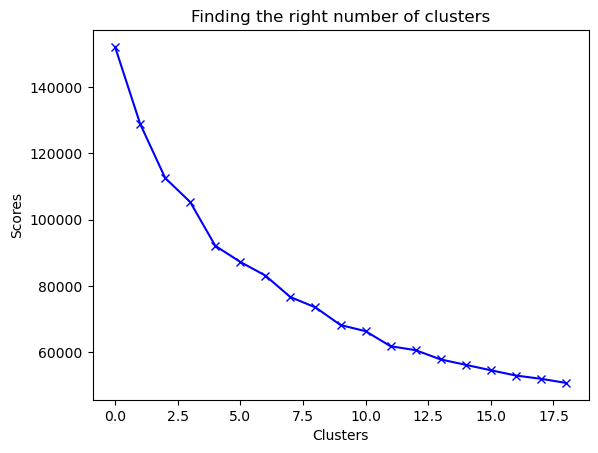

In [59]:
from sklearn.cluster import KMeans

# scores_1 sẽ lưu giá trị inertia của mô hình K-Means với số cụm khác nhau.
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
  
  # kmeans.fit(df_scaled): Huấn luyện mô hình trên dữ liệu đã chuẩn hóa (df_scaled).
  kmeans.fit(df_scaled)
  
  # Trả về tổng bình phương khoảng cách từ các điểm đến tâm cụm (Sum of Squared Errors - SSE).
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

In [ ]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# kmeans.labels_:
# Trả về nhãn cụm (từ 0 đến 7 nếu có 8 cụm) của từng điểm dữ liệu.
# Mỗi giá trị trong labels biểu thị điểm dữ liệu thuộc cụm nào.

In [64]:
data_clt = kmeans.cluster_centers_.shape
print(data_clt)

(8, 17)


In [65]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.695240,-2.180210,-0.326749,-0.241901,-0.328057,-0.296846,-0.588828,-0.449639,-0.470019,-0.469680,-0.348373,-0.437549,-0.243268,-0.226266,-0.284833,0.069286,-0.171935
1,-0.694506,0.092278,0.083765,-0.044223,0.278878,-0.449814,0.897701,0.240621,0.740526,-0.641426,-0.459408,0.167779,0.048950,-0.153513,-0.286278,2.185547,-0.094493
2,1.589620,0.374192,-0.216581,-0.144813,-0.246116,1.993444,-0.467209,-0.169697,-0.436972,1.946438,1.909708,-0.268669,0.982572,0.782025,0.355362,-0.388416,-0.090608
3,-0.001920,0.371565,-0.365787,-0.243002,-0.418340,-0.057048,-0.909480,-0.408284,-0.807056,0.173329,-0.005489,-0.501057,-0.329508,-0.264067,-0.070136,-0.451491,-0.017852
4,0.691708,0.460675,1.988662,1.680927,1.614018,-0.216146,1.156947,1.756287,1.065728,-0.315066,-0.232010,2.346394,1.158444,1.093564,0.184667,0.264549,0.296922
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863
6,-0.184822,0.383073,0.022117,-0.055542,0.154377,-0.315614,0.908201,0.241117,0.795003,-0.367050,-0.305143,0.209938,-0.207202,-0.179485,-0.064555,-0.330420,0.102007
7,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105312,-0.119854,9.509245,-0.520275,0.291491


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = sc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

# 1. Áp dụng inverse transformation để đưa dữ liệu về giá trị ban đầu
### 📌 Mô tả:
#### kmeans.cluster_centers_ chứa tọa độ của các tâm cụm nhưng dưới dạng chuẩn hóa (StandardScaler hoặc MinMaxScaler).
#### sc.inverse_transform(cluster_centers) giúp biến đổi ngược để đưa giá trị về phạm vi ban đầu của dữ liệu gốc.
#### Điều này giúp chúng ta hiểu ý nghĩa thực tế của các tâm cụm.

### 📌 Mô tả:

#### Biến cluster_centers thành DataFrame để hiển thị theo tên cột gốc của df.
#### Mỗi dòng trong cluster_centers đại diện cho một tâm cụm, mỗi cột là một feature.

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers c…use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,117.391212,0.360799,305.099634,190.931465,114.409666,356.371967,0.254025,0.068322,0.177640,0.041156,0.871440,3.834011,3609.165537,1078.126776,180.487021,0.173980,11.287225
1,118.919137,0.899130,1182.169127,519.036355,663.253563,35.590346,0.850641,0.274240,0.658741,0.006788,0.113706,18.880203,4672.385325,1288.738456,177.115880,0.792950,11.390863
2,4873.133665,0.965913,540.475186,352.077987,188.508435,5159.217219,0.302837,0.151834,0.190774,0.524646,16.281182,8.031729,8069.315695,3997.029918,1673.846426,0.040110,11.396061
3,1560.479497,0.965291,221.694948,189.103218,32.767531,859.238791,0.125332,0.080659,0.043693,0.169829,3.211368,2.255417,3295.387803,968.694979,681.303076,0.021661,11.493428
4,3004.206333,0.986400,5252.011621,3382.431177,1870.604334,525.603589,0.954689,0.726392,0.787985,0.072096,1.665529,73.032423,8709.215017,4898.905465,1275.673209,0.231091,11.914676
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,1179.782902,0.968017,1050.457792,500.248481,550.669003,317.014197,0.854855,0.274388,0.680392,0.061694,1.166453,19.928113,3740.390642,1213.552329,694.322910,0.057072,11.653830
7,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407


In [ ]:
labels.shape # Labels associated to each data point
## Hiển thị số lượng phần tử 

(8950,)

In [ ]:
labels.max()
# .max() lấy chỉ số cụm lớn nhất trong labels.

7

In [ ]:
labels.min()
# .min() lấy chỉ số cụm nhỏ nhất trong labels

0

In [40]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans


array([4, 3, 2, ..., 7, 7, 7])

In [ ]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

## 📌 Mô tả:

# pd.DataFrame({'cluster': labels}) → Tạo DataFrame mới chứa cột "cluster" lấy từ labels (nhãn cụm của từng điểm dữ liệu).
# pd.concat([...], axis=1) → Nối cột "cluster" vào df theo chiều ngang (axis=1).
# df_cluster.head() → Hiển thị 5 dòng đầu tiên của DataFrame sau khi thêm cột "cluster".

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


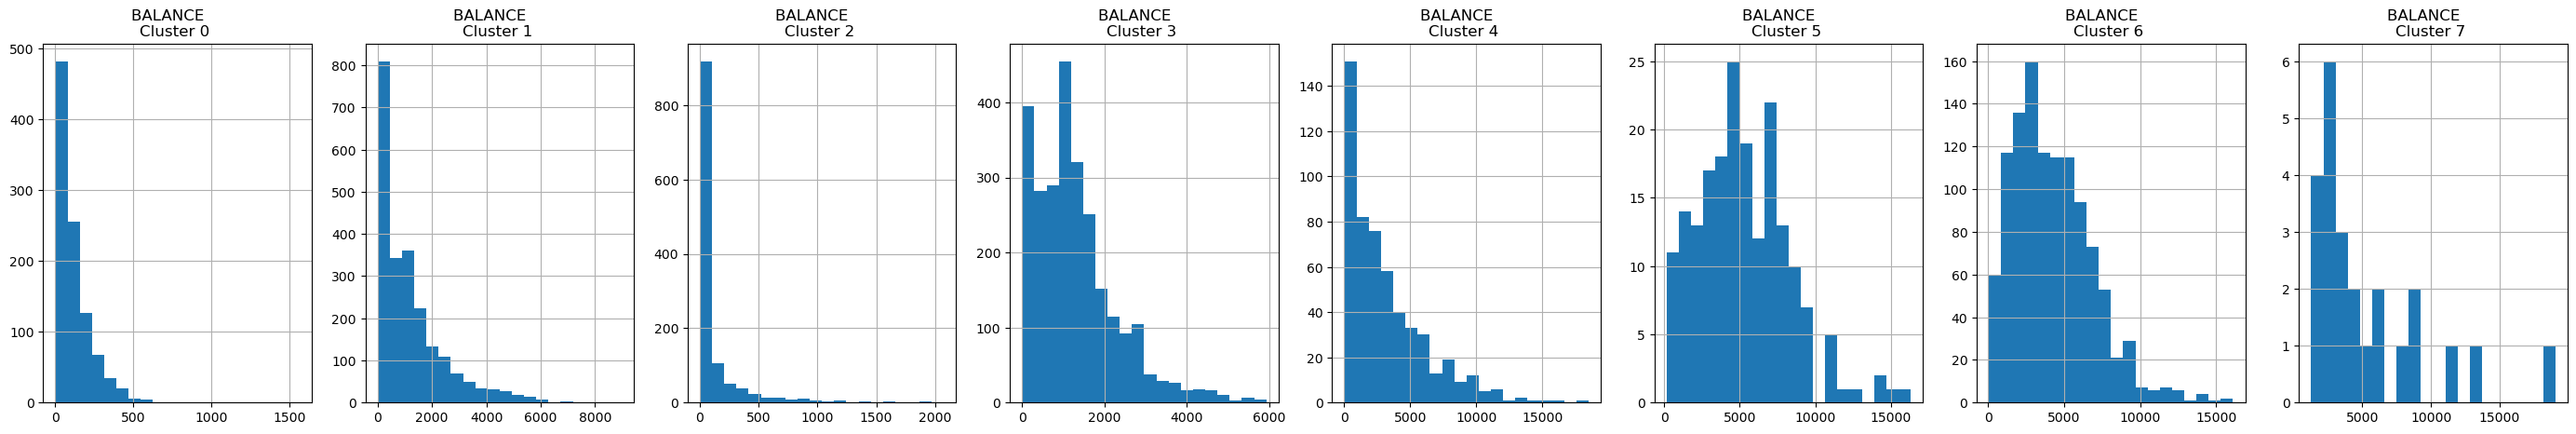

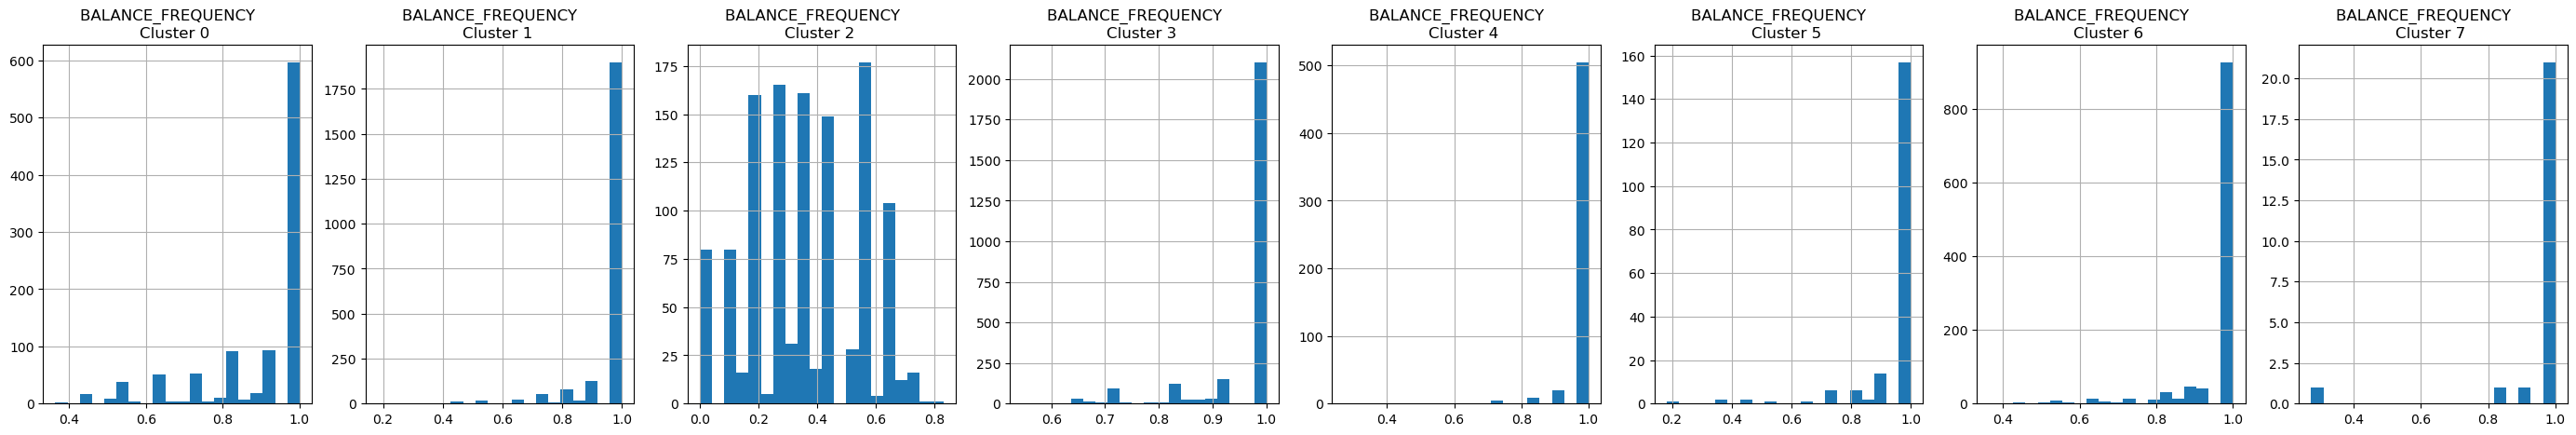

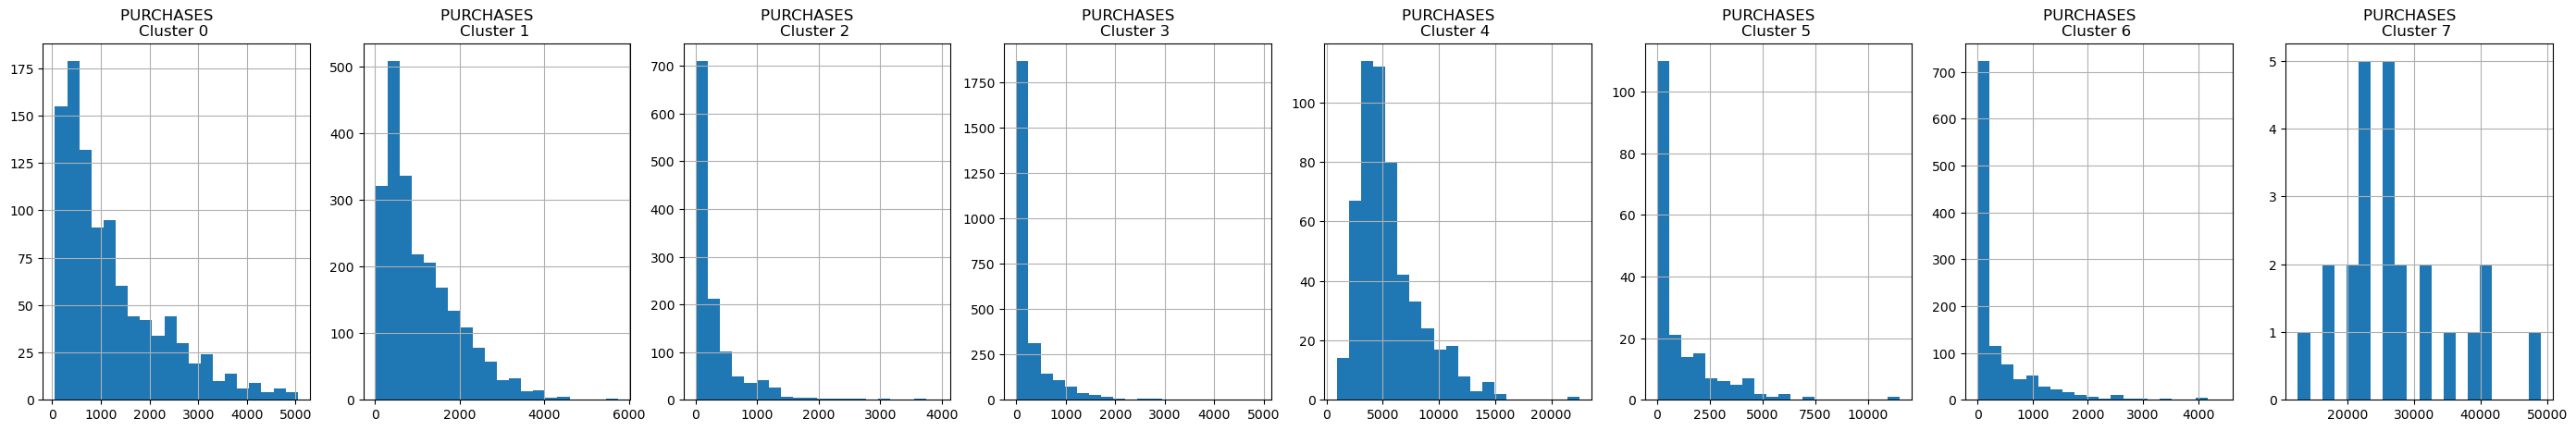

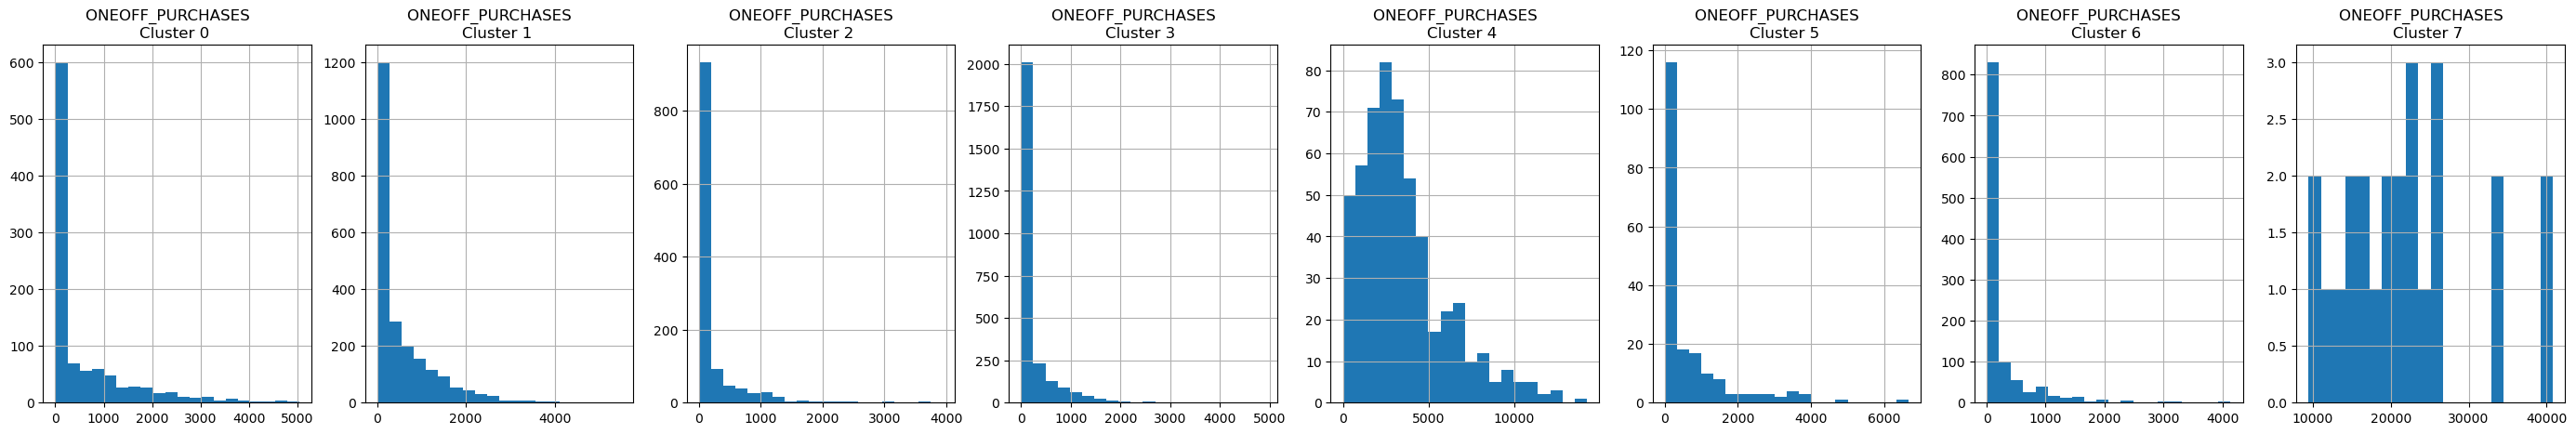

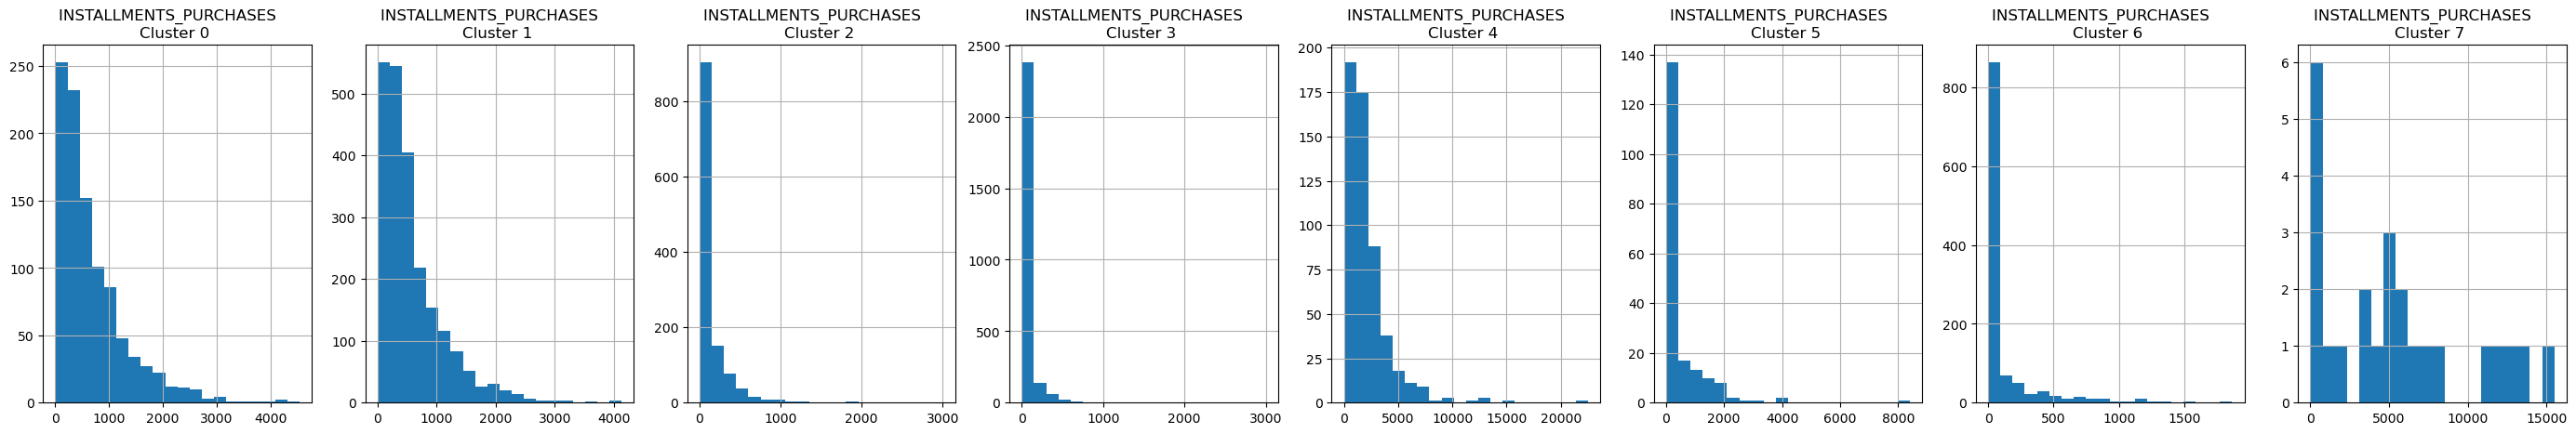

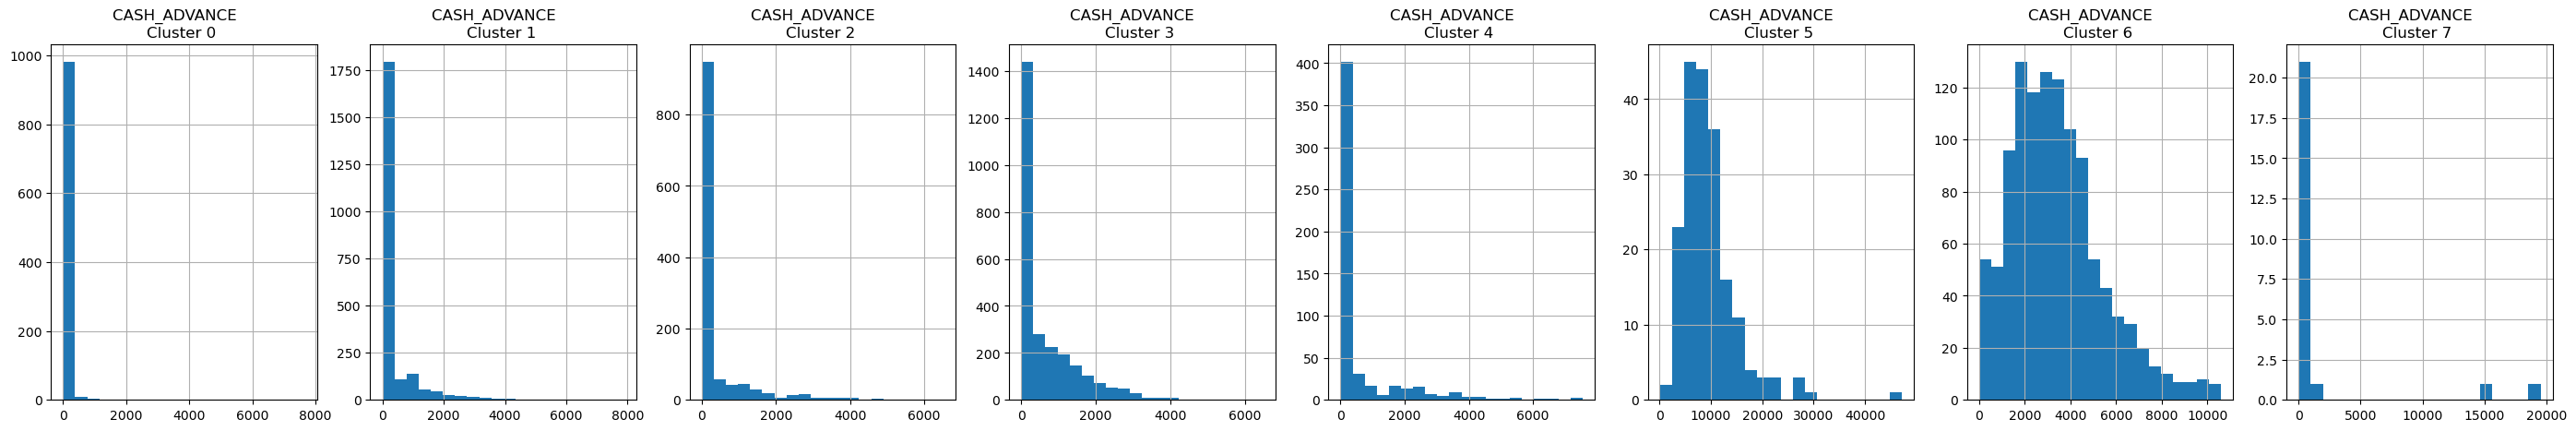

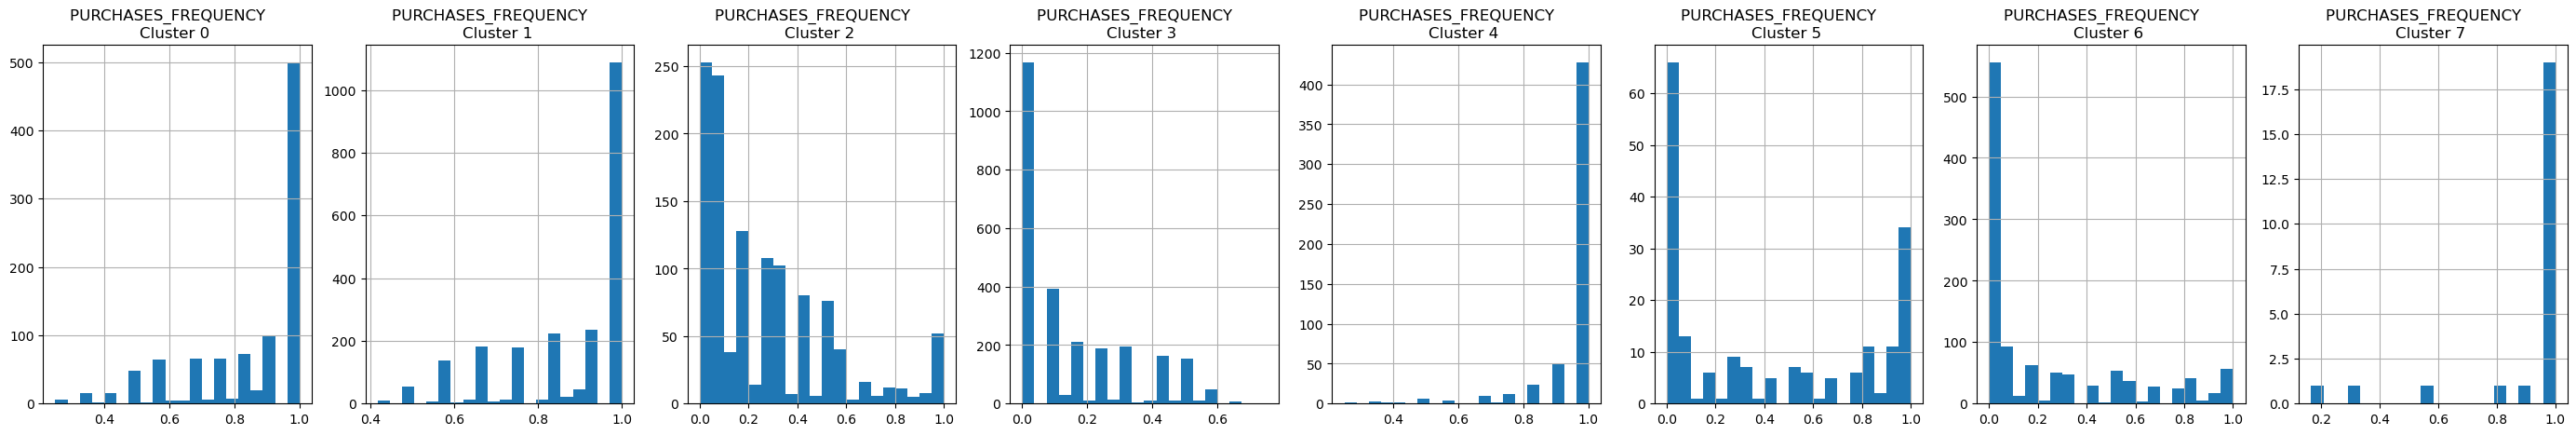

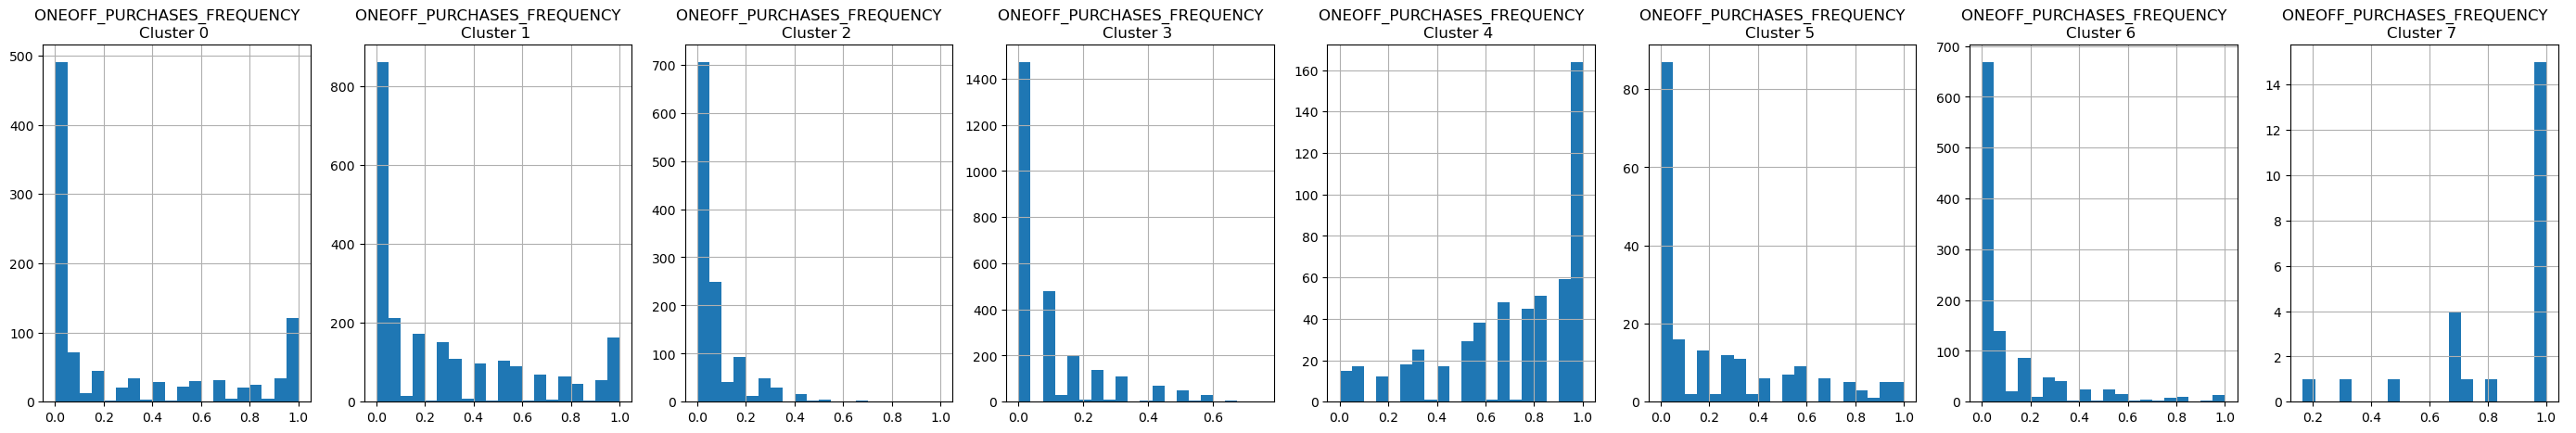

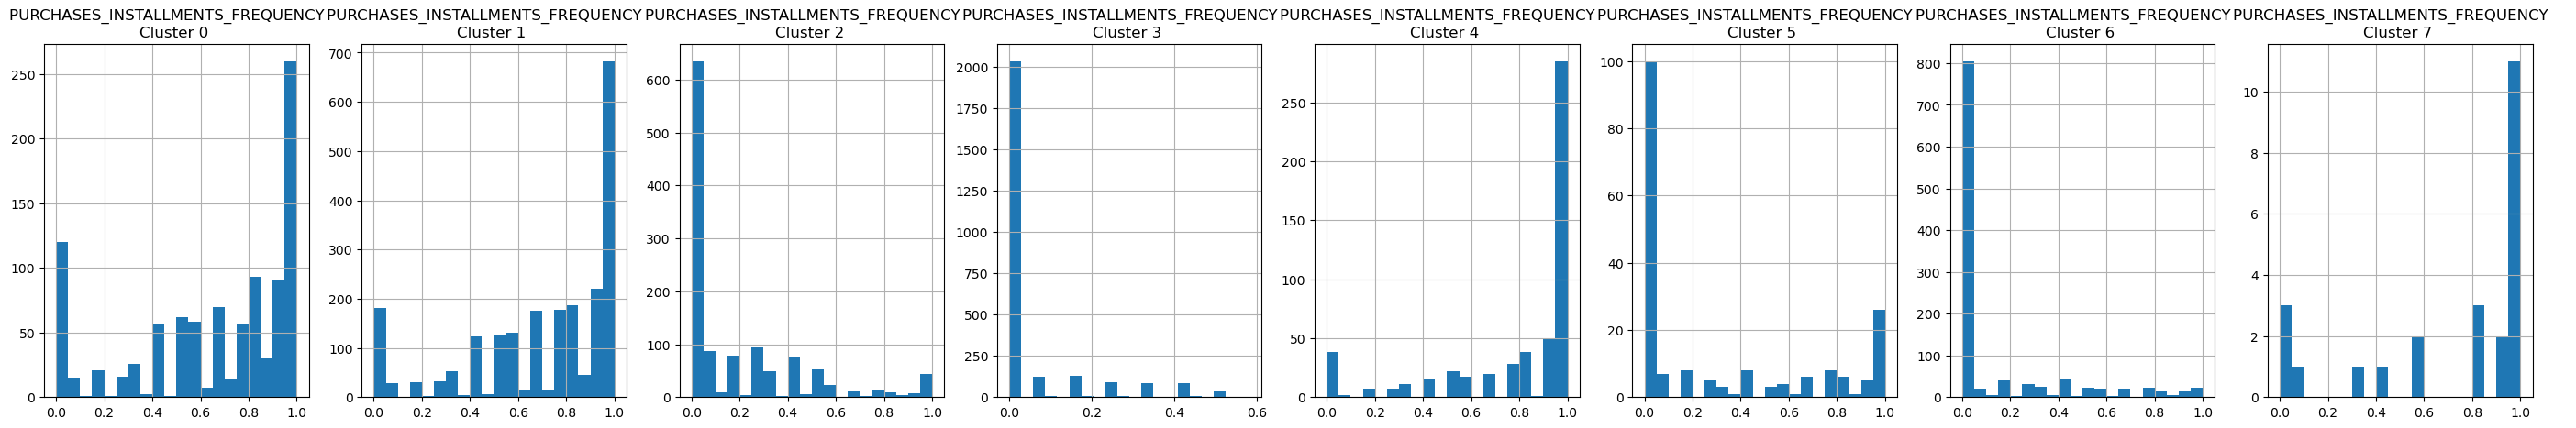

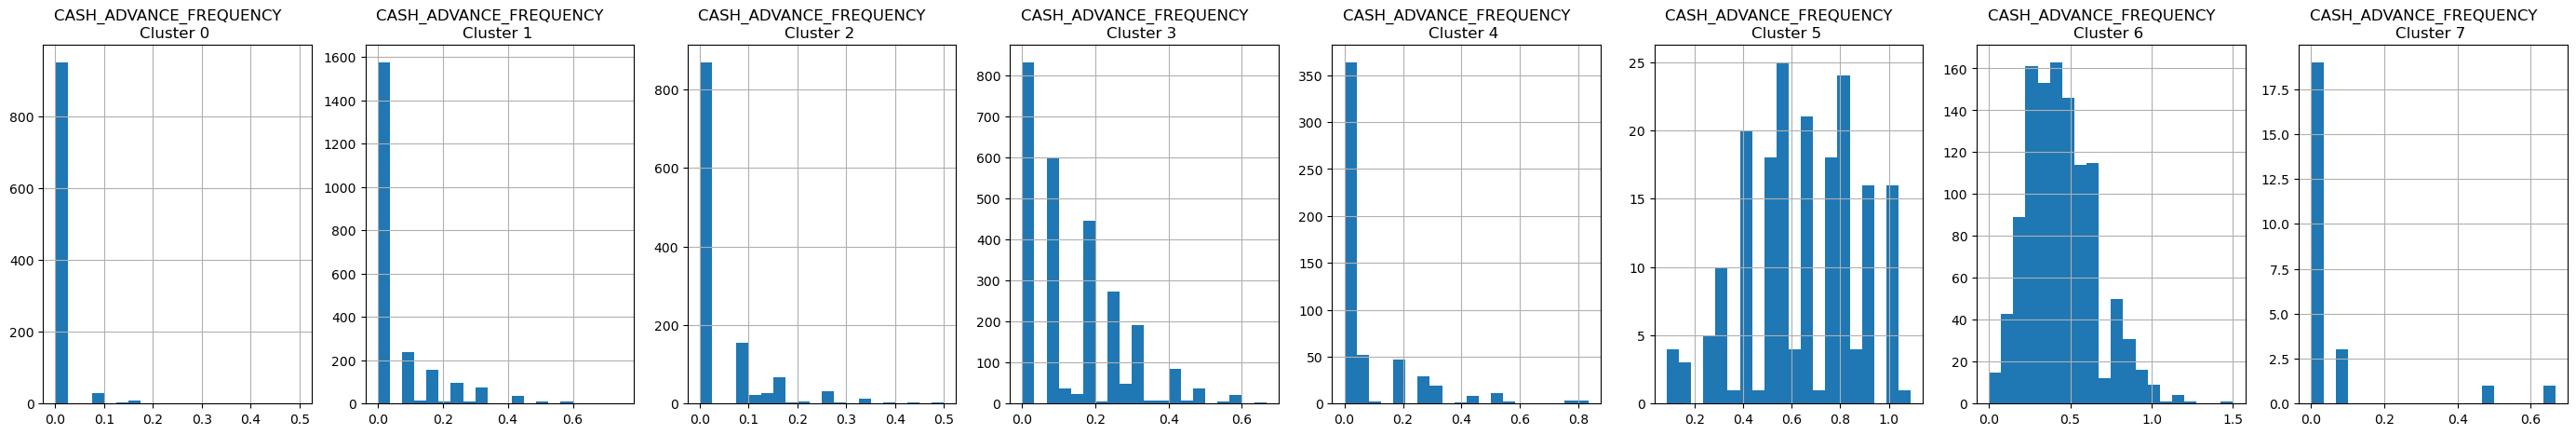

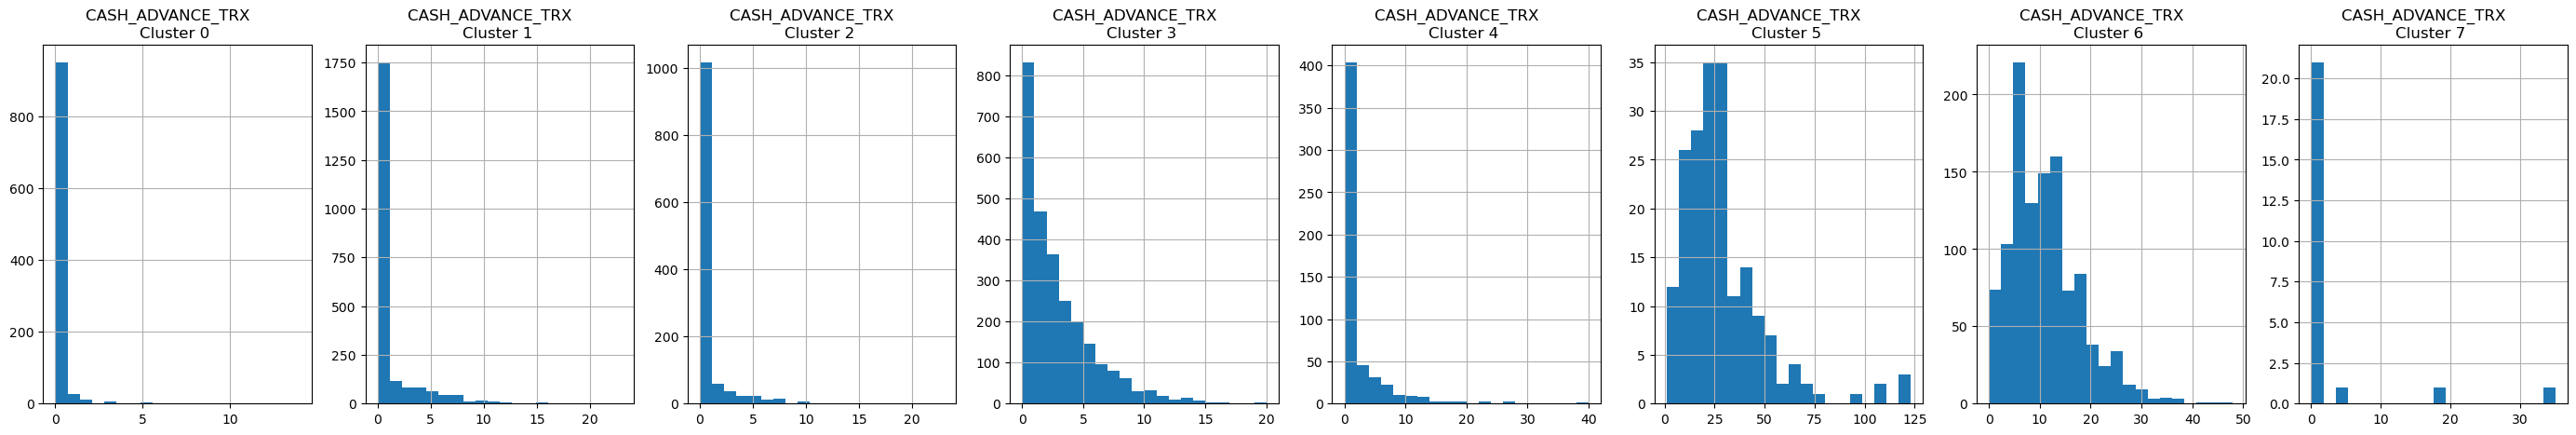

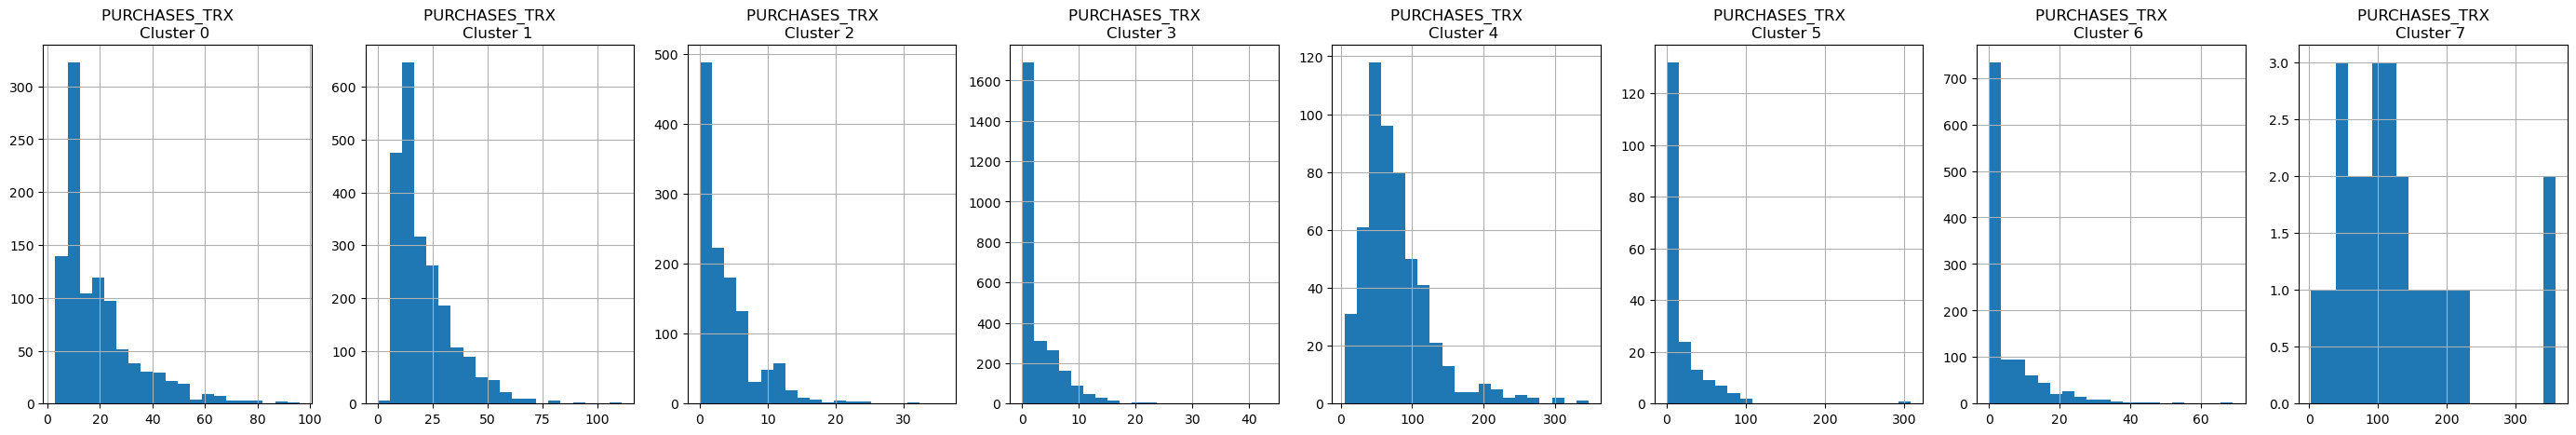

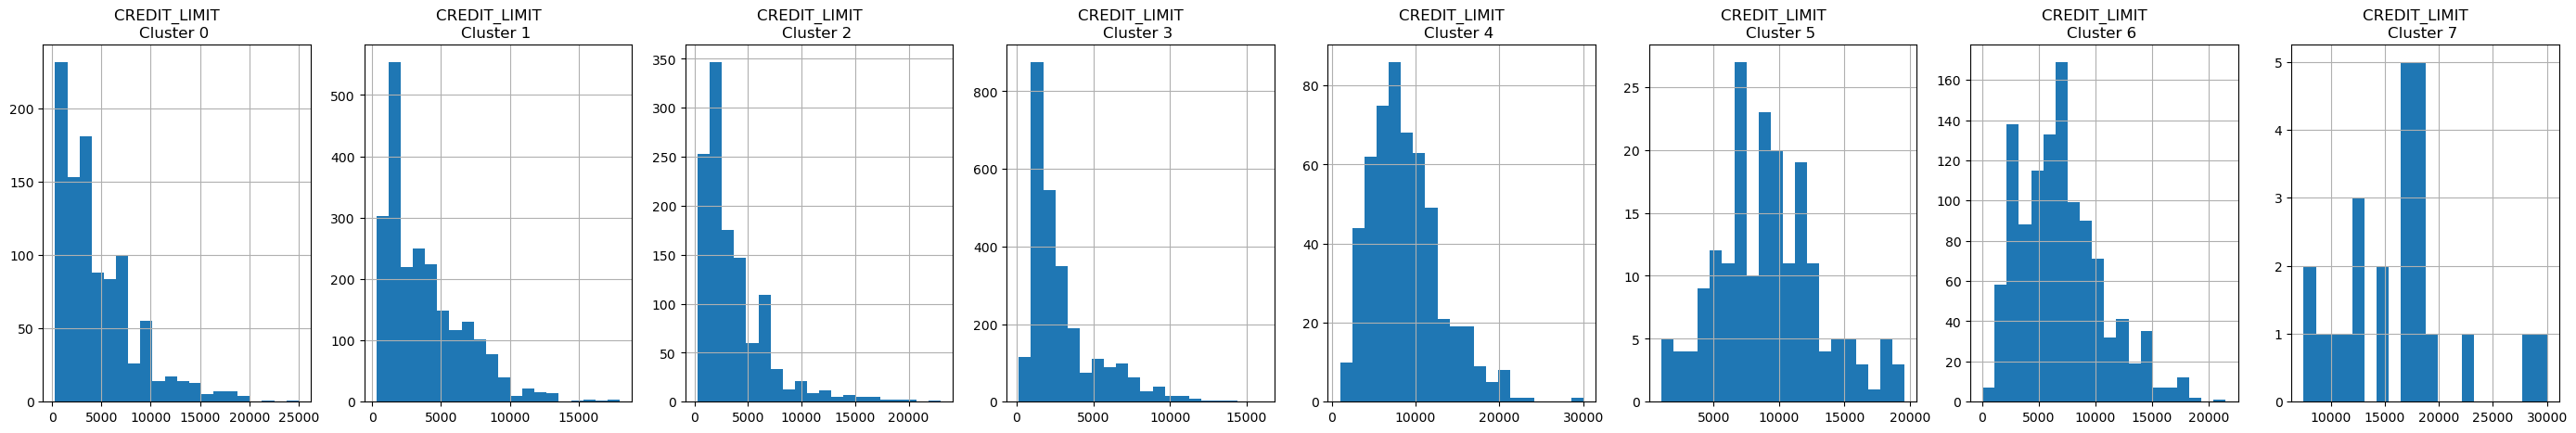

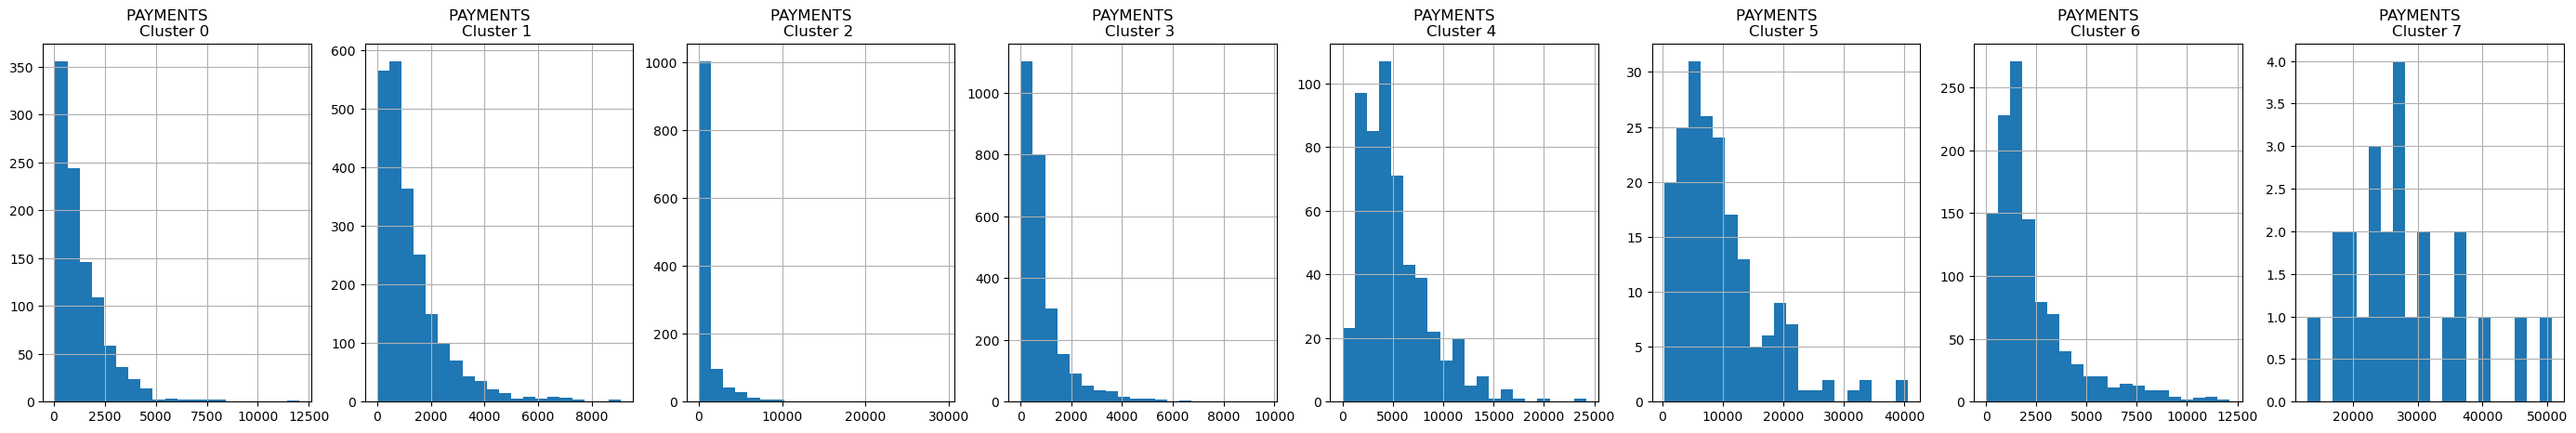

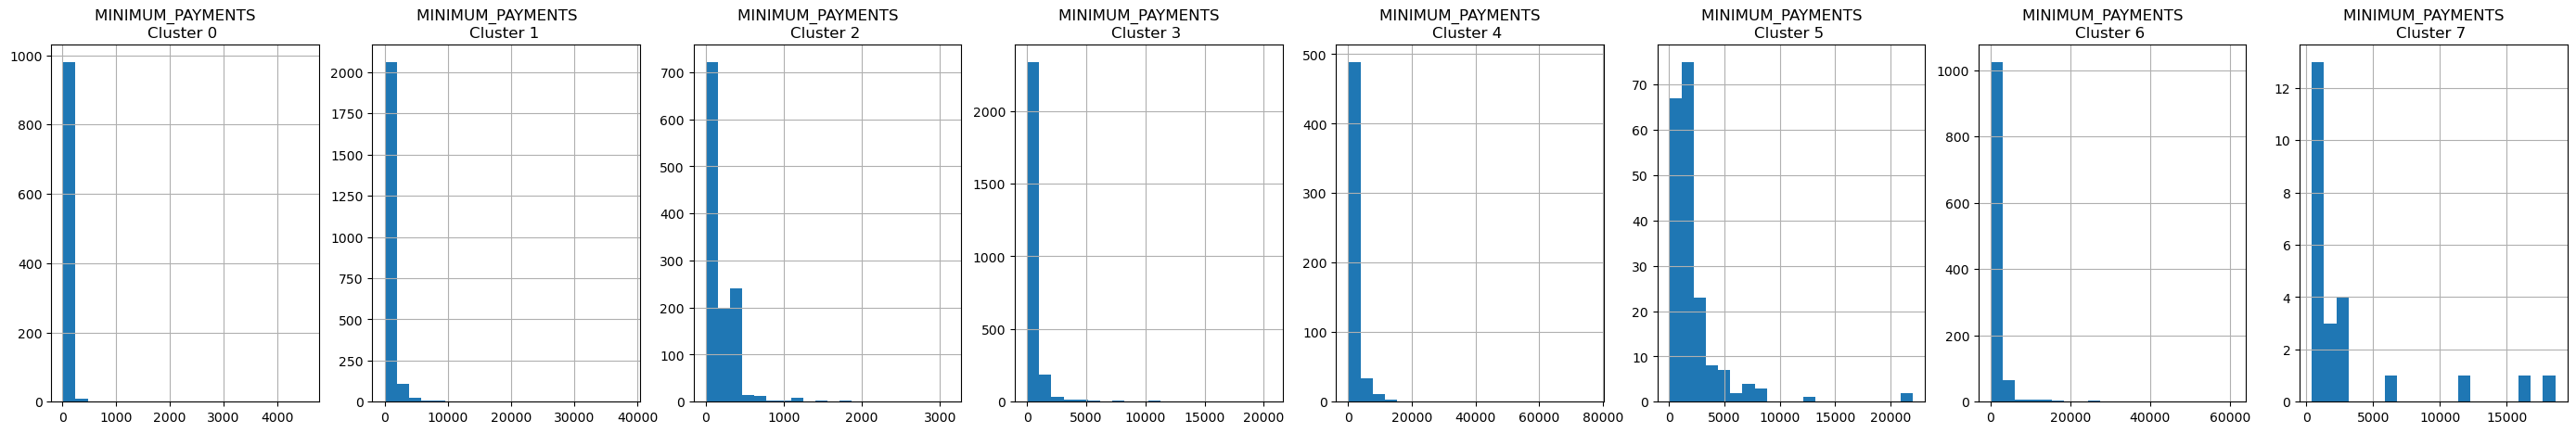

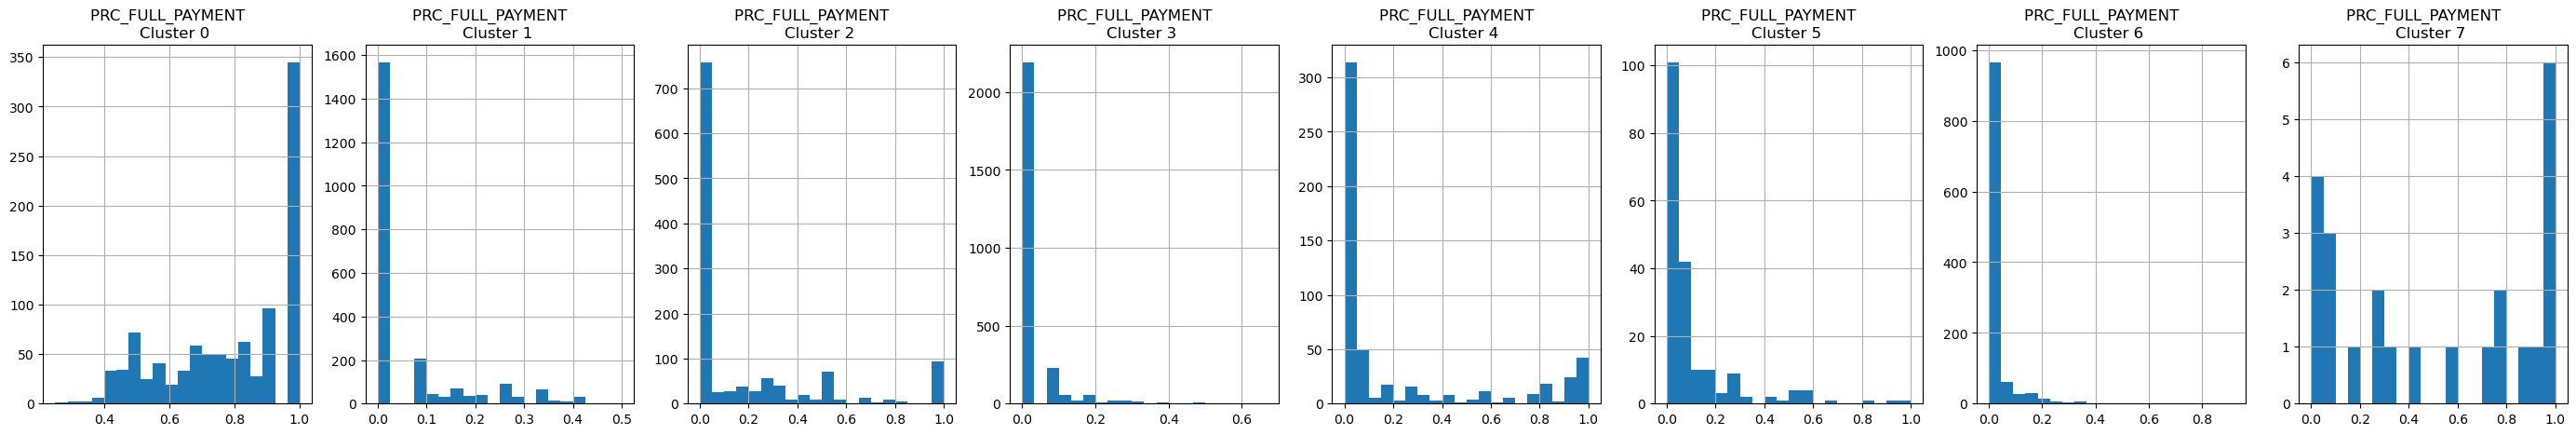

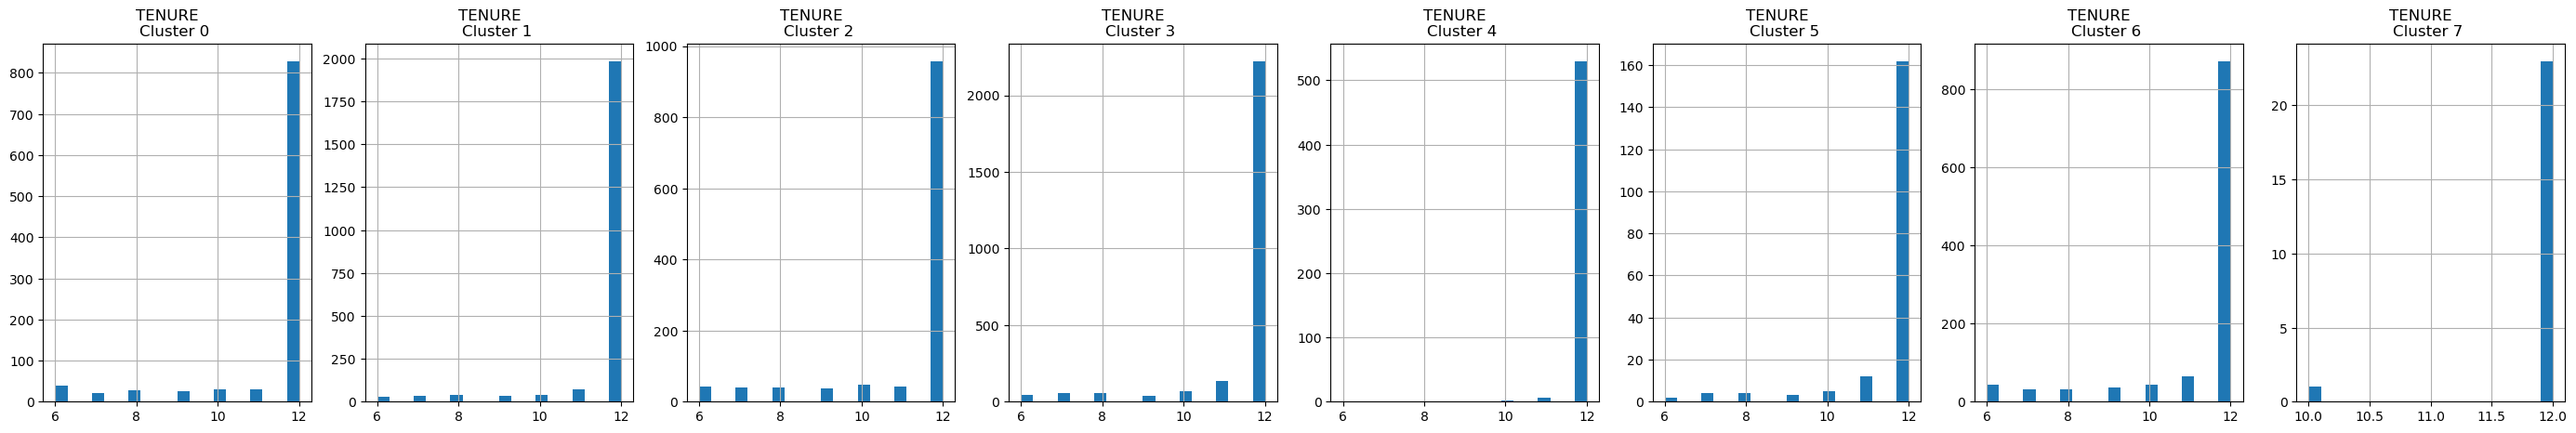

In [ ]:
# Plot the histogram of various clusters
for i in df.columns:
  # Tạo một figure mới với kích thước rộng (35x5) để hiển thị các biểu đồ cho tất cả 8 cụm trên cùng một hàng
  plt.figure(figsize = (35, 5))
  # Duyệt qua từng cụm (0 đến 7) vì KMeans(n_clusters=8) đã phân dữ liệu thành 8 cụm.
  for j in range(8):
    # Chia figure thành 8 ô (1 hàng, 8 cột), mỗi ô tương ứng với một cụm.
    plt.subplot(1,8,j+1)
    # Lọc dữ liệu chỉ chứa các điểm thuộc cụm j.
    cluster = df_cluster[df_cluster['cluster'] == j]
    # Vẽ histogram cho biến i của cụm j, với 20 bins.
    cluster[i].hist(bins = 20)
    # Đặt tiêu đề của biểu đồ, gồm tên biến i và số cụm j.
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



In [ ]:
# Obtain the principal components 

from sklearn.decomposition import PCA

# Khởi tạo mô hình PCA với 2 thành phần chính (n_components=2), nghĩa là giảm số chiều của dữ liệu xuống còn 2.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68364879, -1.07224148],
       [-1.13408493,  2.50914981],
       [ 0.96939499, -0.3835769 ],
       ...,
       [-0.92898512, -1.80804835],
       [-2.33784475, -0.65361133],
       [-0.55802653, -0.4006461 ]])

In [ ]:
# Create a dataframe with the two components

# pca1: Thành phần chính thứ nhất (PC1).
# pca2: Thành phần chính thứ hai (PC2).
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.683649,-1.072241
1,-1.134085,2.509150
2,0.969395,-0.383577
3,-0.888220,0.004648
4,-1.600021,-0.683795


In [ ]:
# Concatenate the clusters labels to the dataframe

## 📌 Ý nghĩa:

# Ghép nhãn cụm (labels) vào pca_df.
# Sử dụng pd.concat() để nối thêm cột cluster vào dataframe pca_df.
# axis=1 → Ghép theo cột (thêm một cột mới).

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683649,-1.072241,3
1,-1.134085,2.509150,6
2,0.969395,-0.383577,1
3,-0.888220,0.004648,3
4,-1.600021,-0.683795,3


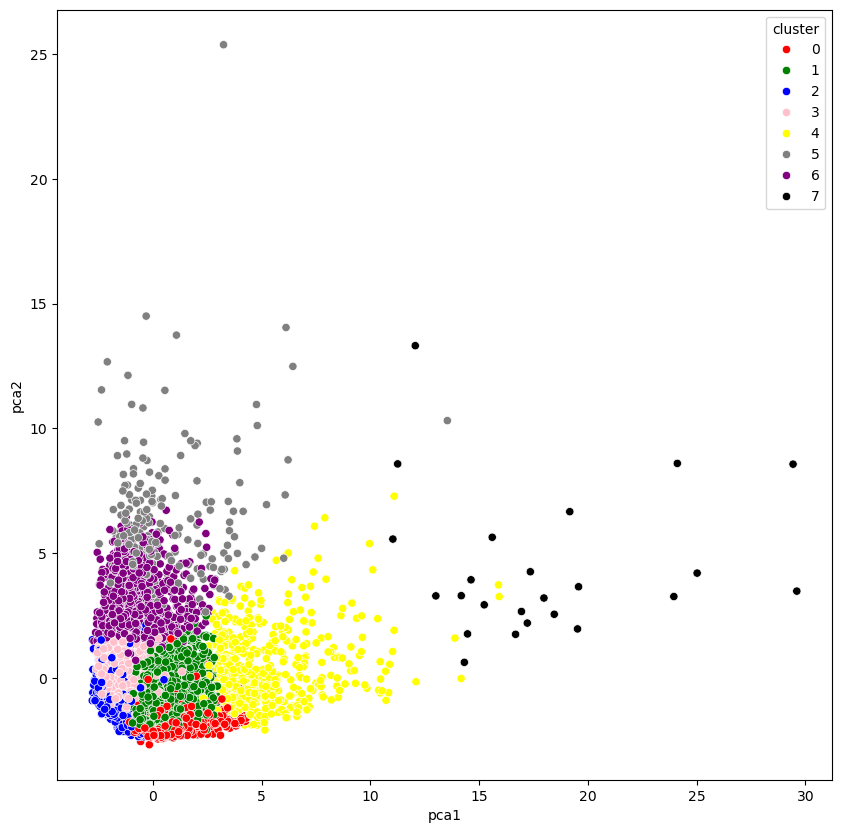

In [ ]:
## 📌 Ý nghĩa:

# x="pca1", y="pca2" → Trục X là PC1, trục Y là PC2 (sau khi giảm chiều với PCA).
# hue="cluster" → Mỗi cụm sẽ có một màu riêng biệt.
# data=pca_df → Lấy dữ liệu từ dataframe pca_df (chứa cột pca1, pca2, cluster).
# palette=[...] → Định nghĩa màu sắc riêng cho từng cụm.

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [67]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

# Kích thước dữ liệu đầu vào
input_dim = 17  
encoding_dim = 10  

# ====== Tạo mô hình Autoencoder ======
input_df = Input(shape=(input_dim,))

# Encoder - Nén dữ liệu
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(encoding_dim, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoder - Khôi phục dữ liệu
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(input_dim, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

# ====== Xây dựng mô hình ======
autoencoder = Model(input_df, decoded)  # Autoencoder đầy đủ
encoder = Model(input_df, encoded)  # Encoder riêng

# ====== Compile mô hình ======
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# ====== Hiển thị mô hình ======
autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │        20,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2000)           │        22,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307,653 (8.80 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
df_scaled.shape

(8950, 17)

In [69]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.9326
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.7769
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.7137
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.7083
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.6799
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.6508
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.6563
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.6292
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.6718
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.6571
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.6705
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.6461
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.6893
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.6214
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.6972
Epoc

In [71]:
pred = encoder.predict(df)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [72]:
pred.shape

(8950, 10)

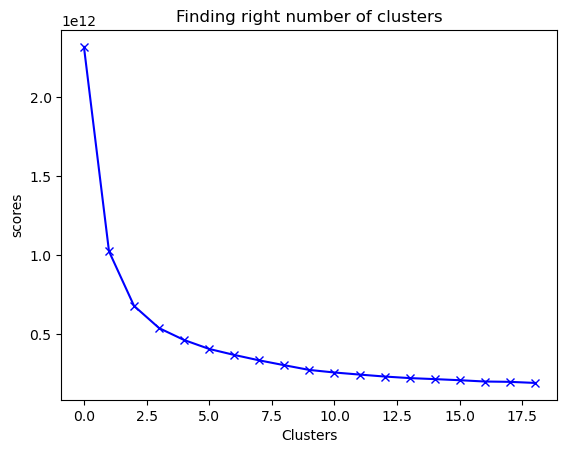

In [74]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

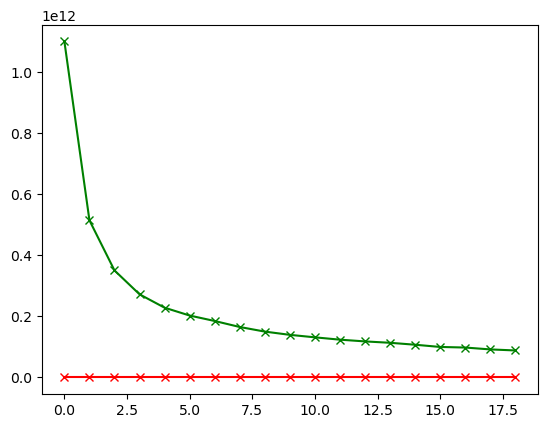

In [53]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df)

In [77]:
data_clt = kmeans.cluster_centers_.shape
print(data_clt)

(4, 17)


In [78]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [79]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-14217.513672,-1009.769287
1,20774.568359,-5282.425293
2,9147.619141,-2595.449951
3,4834.660156,-813.011536
4,-12327.953125,-1181.447021


In [80]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-14217.513672,-1009.769287,0
1,20774.568359,-5282.425293,1
2,9147.619141,-2595.449951,2
3,4834.660156,-813.011536,2
4,-12327.953125,-1181.447021,0


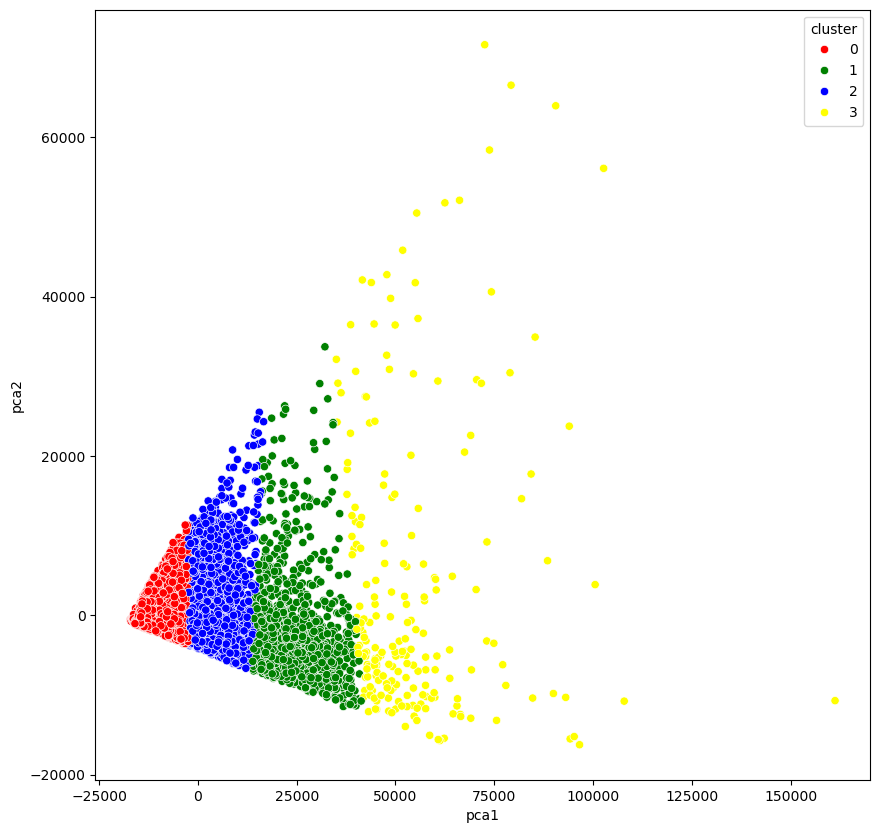

In [81]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()